In [111]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import spatial
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
#move up in directory
os.chdir('../')

from helpers import dot2_

In [112]:
os.getcwd()

'C:\\Users\\Bio_Psych\\Desktop\\Deniz\\tf-cpu\\p1_generalization'

In [113]:
d = pickle.load(open('data\\rnn_raw_data\\lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_18_test_b_daw_p_3', 'rb'))
df = d.reset_index()

In [328]:
num_pcs = 4
num_ins = 20
    
        
### Get AUROC
lr_aucs = np.zeros((num_ins, num_pcs))        

for id_ in range(num_ins):
    
    d = pickle.load(open('data\\rnn_raw_data\\lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_1'.format(id_), 'rb'))
    df = d.reset_index()
    
    # GET DV
    dv = df['is_switch']
    
    ### calculate PCs
    pca = PCA()
    hidden_units = df.loc[:, [col.startswith('rnn_state') for col in df.columns.values]]
    st_hidden = MinMaxScaler().fit_transform(hidden_units)    
    
    for i in range(num_pcs):

        # data splitting
#         X_train, X_test, Y_train, Y_test = train_test_split(pca.fit_transform(st_hidden)[:,i], switches, test_size = .2
#                                                             , random_state = 0)

        X_train, X_test, Y_train, Y_test = train_test_split(df['reward'].shift(i)[i:], switches[i:], test_size = .4
                                                    , random_state = 0)

        # debug to check number of switches in test trian split
#         print('Y_train switches = {}'.format(np.sum(Y_train)))
#         print('Y_test switches = {}'.format(np.sum(Y_test)))



        # build classification model        
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
        lr = LogisticRegression()
        lr.fit(X_train, Y_train)

        # Prediction probabilities

        lr_probs = lr.predict_proba(X_test)

        # calculate AUROC    
        lr_auc = roc_auc_score(Y_test, lr_probs[:,1])
        
        lr_aucs[id_,i] = lr_auc
    
#     test = df[['softmax_1', 'softmax_2', 'softmax_3', 'softmax_4']]

#     test['PC1'] = pca.fit_transform(hidden_units)[:,0]
#     test['PC2'] = pca.fit_transform(hidden_units)[:,1]
#     test['PC3'] = pca.fit_transform(hidden_units)[:,2]

#     test['reward'] = df['reward']
    
#     test['reward t-1'] = df['reward'].shift(1)

#     test['value'] = df['value']
    
#     test['value t-1'] = df['value'].shift(1)

#     test['switch'] = df['is_switch']

#     plt.subplots(figsize=(10, 10))
#     sns.heatmap(test.corr(), annot=True)
#     plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PC 1'),
  Text(1, 0, 'PC 2'),
  Text(2, 0, 'PC 3'),
  Text(3, 0, 'PC 4')])

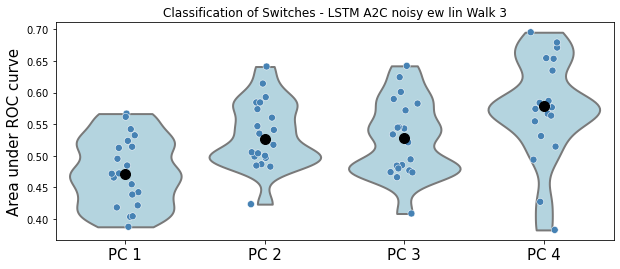

In [329]:
plt.figure(figsize=(10,4))

sns.violinplot(data=lr_aucs,
               scale='count', inner=None, linewidth=2, color='lightblue',
               saturation=0.75, cut = 0, bw=0.3)

sns.stripplot(data=lr_aucs, size = 7,
              jitter=True, linewidth=0.5, color = 'steelblue', edgecolor='white')

medians = pd.Series(np.median(lr_aucs, axis = 0))

sns.swarmplot(x=medians.index, y=medians,
              color='black', edgecolor='black', linewidth=1, size=10)

plt.xticks(range(num_pcs), ['PC {}'.format(i+1) for i in range(num_pcs)])

plt.ylabel("Area under ROC curve", fontsize=15)
plt.title('Classification of Switches - LSTM A2C noisy ew lin Walk 3')
plt.xticks(fontsize = 15)

# CORRELATIONS

C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<AxesSubplot:>

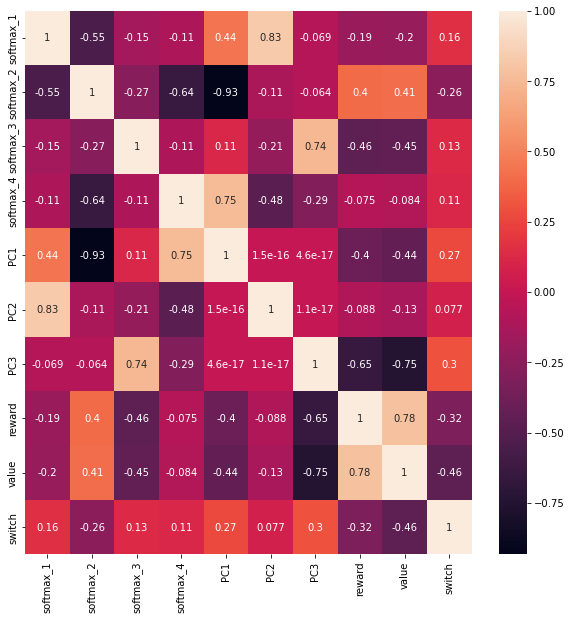

In [199]:
# simple correaltions matrix to see whether actions correlate with PCs



test = df[['softmax_1', 'softmax_2', 'softmax_3', 'softmax_4']]

test['PC1'] = pca3.fit_transform(hidden_units)[:,0]
test['PC2'] = pca3.fit_transform(hidden_units)[:,1]
test['PC3'] = pca3.fit_transform(hidden_units)[:,2]
# test['PC1XPC3'] = np.multiply(pca1.fit_transform(hidden_units)[:,0], pca1.fit_transform(hidden_units)[:,2])
# test['PC2XPC3'] = np.multiply(pca1.fit_transform(hidden_units)[:,1], pca1.fit_transform(hidden_units)[:,2])
# test['PC1XPC2'] = np.multiply(pca1.fit_transform(hidden_units)[:,0], pca1.fit_transform(hidden_units)[:,1])


test['reward'] = df['reward']
# test['reward_t-1'] = df['reward'].shift(1)
# test['reward_t-2'] = df['reward'].shift(2)
# test['reward_t-3'] = df['reward'].shift(3)
# test['reward_t-4'] = df['reward'].shift(4)
test['value'] = df['value']
# test['value_t-1'] = df['value'].shift(1)
# test['value_t+1'] = df['value'].shift(-1)

# test['soft_max_1_t+1'] = df['softmax_1'].shift(-1)
# test['soft_max_2_t+1'] = df['softmax_2'].shift(-1)
# test['soft_max_3_t+1'] = df['softmax_3'].shift(-1)
# test['soft_max_4_t+1'] = df['softmax_4'].shift(-1)

#test['reward_rpe'] = df['value'].values  - df['value'].shift(1).values

test['switch'] = df['is_switch']
# test['acc'] = df['accuracy']

plt.subplots(figsize=(10, 10))
sns.heatmap(test.corr(), annot=True)

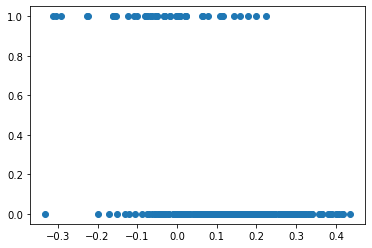

In [202]:
plt.scatter(test['reward'].shift(1), test['switch'])

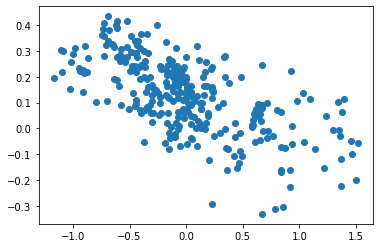

In [191]:
plt.scatter(test['PC3'], test['reward'])

In [190]:
result = 1 - spatial.distance.cosine(test['switch'], test['PC3'])
result

0.27812480265880146

In [101]:
df['choice'].value_counts()

1    165
3     58
0     53
2     24
Name: choice, dtype: int64